# Underfitting vs. Overfitting

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import  metrics

Rozważmy następujący zbiór punktów:

In [4]:
np.random.seed(0)
n_samples = 30
true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

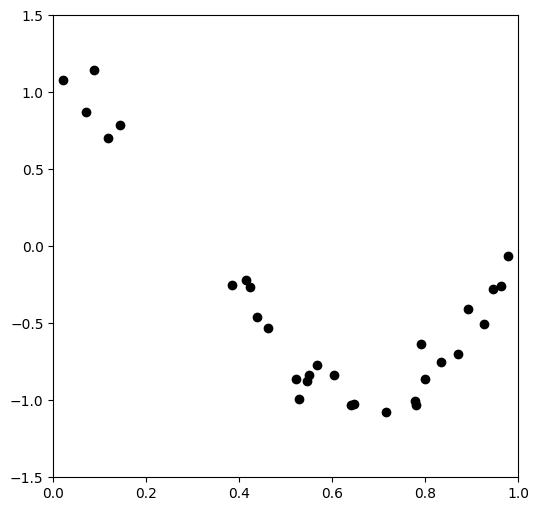

In [5]:
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X, y,  color='black')
x_tr = np.linspace(0, 1, 200)
plt.show()

Podziel dane na dwie grupy.

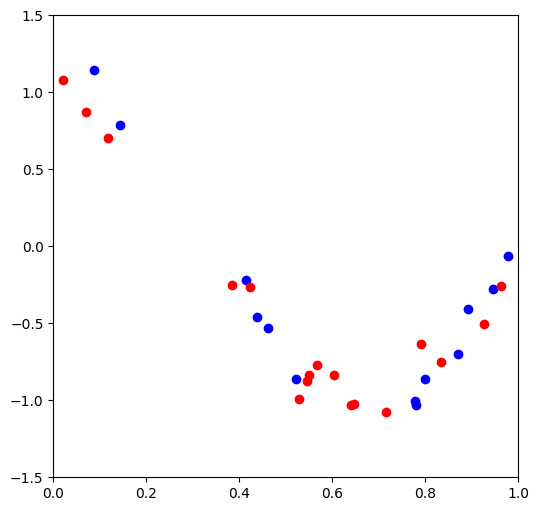

In [6]:
s=np.random.random_sample(n_samples)
s[s>0.5]=1
s[s<=0.5]=0
s
X1=X[s==1]
y1=y[s==1]
X2=X[s==0]
y2=y[s==0]

# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')
x_tr = np.linspace(0, 1, 200)
plt.show()

# Zadanie
Wykonaj regresję:

* liniową
* wielomianową stopnia 20

w każdej z grup.

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import  metrics
from sklearn.metrics import r2_score

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression().fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)

print('R2 score: ', r2)

R2 score:  0.4875194899546942


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

poly = PolynomialFeatures(degree=20)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression().fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)

print('R2 score: ', r2)

R2 score:  -304000329301.6794


# Zadanie
Wykonaj 100 podziałów na dwie równe części. Za każdym razem naucz regresję:

* liniową
* wielomianową stopnia 1, 2, 3, 4, 5, 6

na jednym fragmęcie i policz R_square na drugim.
Zwizualizuj wynik.


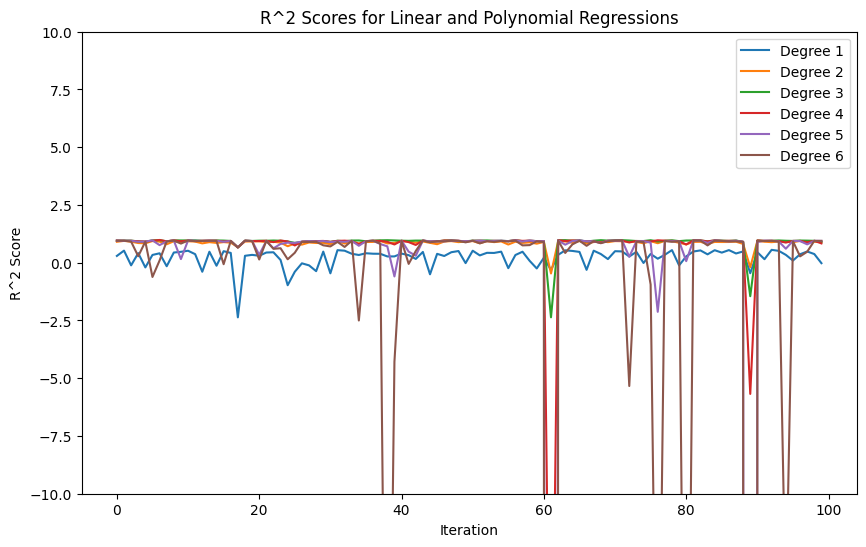

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

X = X.reshape(-1, 1)


r2_results = {degree: [] for degree in range(1, 7)}

for i in range(100):
  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

    for degree in range(1, 7):
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        
        model = LinearRegression().fit(X_train_poly, y_train)
        
        y_pred = model.predict(X_test_poly)
        r2 = r2_score(y_test, y_pred)
        
        r2_results[degree].append(r2)

plt.figure(figsize=(10, 6))
for degree in range(1, 7):
    plt.plot(r2_results[degree], label=f'Degree {degree}')

plt.xlabel('Iteration')
plt.ylabel('R^2 Score')
plt.legend()
plt.title('R^2 Scores for Linear and Polynomial Regressions')
#plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.show()
